In [1]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_excel(r"C:\Users\lenovo\Desktop\New folder (3)\Project Session\My PROJECTS DATASETS\Data_Train.xlsx")

df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [3]:
df.shape

(10683, 11)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [5]:
df["Additional_Info"].value_counts()/len(df)*100

No info                         78.114762
In-flight meal not included     18.552841
No check-in baggage included     2.995413
1 Long layover                   0.177853
Change airports                  0.065525
Business class                   0.037443
No Info                          0.028082
1 Short layover                  0.009361
Red-eye flight                   0.009361
2 Long layover                   0.009361
Name: Additional_Info, dtype: float64

In [6]:
# Additional_Info contains almost 80% no_info

In [7]:
df.drop(["Additional_Info"],axis=1,inplace=True)

In [8]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,13302


In [9]:
df["Airline"].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

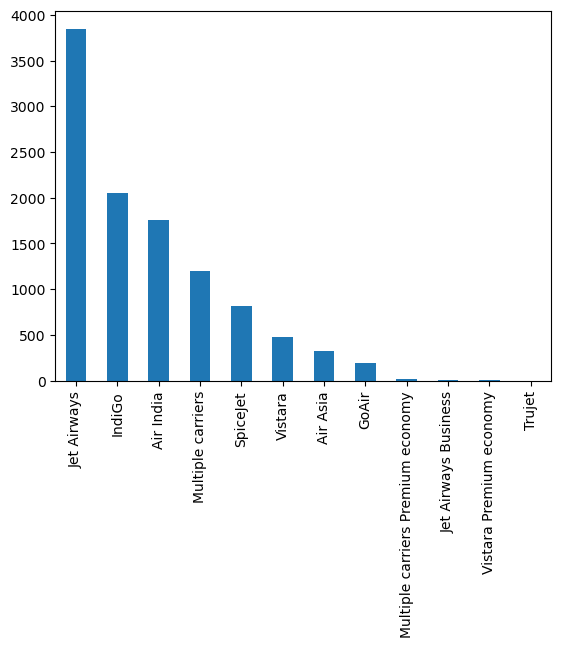

In [10]:
df["Airline"].value_counts().plot.bar()
plt.show()

# EDA
From description we can see that Date_of_Journey is a object data type,
Therefore, we have to convert this datatype into timestamp so as to use this column properly for prediction

For this we require pandas to_datetime to convert object data type to datetime dtype.

1).dt.day method will extract only day of that date

2).dt.month method will extract only month of that date

In [11]:
df["Journey Day"]=pd.to_datetime(df["Date_of_Journey"],format="%d/%m/%Y").dt.day
df["Journey Month"]=pd.to_datetime(df["Date_of_Journey"],format="%d/%m/%Y").dt.month

df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,Journey Day,Journey Month
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,3897,24,3
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,7662,1,5
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,13882,9,6
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,6218,12,5
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,13302,1,3


In [12]:
## Since we have converted Date_of_Journey column into integers, Now we can drop as it is of no use.


In [13]:
df.drop(["Date_of_Journey"],axis=1,inplace=True)

In [14]:
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,Journey Day,Journey Month
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,7662,1,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,13882,9,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,6218,12,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,13302,1,3


In [15]:
df["Departure Hour"]=pd.to_datetime(df["Dep_Time"]).dt.hour
df["Departure Minute"]=pd.to_datetime(df["Dep_Time"]).dt.minute

df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,Journey Day,Journey Month,Departure Hour,Departure Minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,7662,1,5,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,13882,9,6,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,6218,12,5,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,13302,1,3,16,50


In [16]:
df.drop(["Dep_Time"],axis=1,inplace=True)
df.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Price,Journey Day,Journey Month,Departure Hour,Departure Minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,7662,1,5,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,13882,9,6,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,6218,12,5,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,13302,1,3,16,50


In [17]:
df["Arrival hour"]=pd.to_datetime(df["Arrival_Time"]).dt.hour
df["Arrival Min"]=pd.to_datetime(df["Arrival_Time"]).dt.minute
df.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Price,Journey Day,Journey Month,Departure Hour,Departure Minute,Arrival hour,Arrival Min
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,13302,1,3,16,50,21,35


In [18]:
df.drop(["Arrival_Time"],axis=1,inplace=True)
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Price,Journey Day,Journey Month,Departure Hour,Departure Minute,Arrival hour,Arrival Min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,13302,1,3,16,50,21,35


In [19]:
# Assigning and converting Duration column into list

duration=list(df["Duration"])

duration_hour=[]
duration_min=[]

for i in range(len(duration)):
    if len(duration[i].split()) !=2:           # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i]=duration[i].strip()+" 0m"        # Adds 0 minute
        else:
            duration[i]="0h "+ duration[i]                # Adds 0 hour
        
for i in range(len(duration)):
    duration_hour.append(duration[i].split("h")[0])           # Extract hours from duration
    duration_min.append(duration[i].split("m")[0].split()[-1])      # Extracts only minutes from duration

#duration[1].split("m")[0].split()[-1]
duration_min

['50',
 '25',
 '0',
 '25',
 '45',
 '25',
 '30',
 '5',
 '30',
 '50',
 '15',
 '35',
 '15',
 '10',
 '35',
 '35',
 '30',
 '35',
 '0',
 '35',
 '10',
 '20',
 '50',
 '55',
 '20',
 '10',
 '45',
 '55',
 '50',
 '15',
 '15',
 '25',
 '50',
 '0',
 '30',
 '25',
 '15',
 '30',
 '15',
 '55',
 '5',
 '30',
 '5',
 '45',
 '0',
 '50',
 '50',
 '15',
 '5',
 '55',
 '15',
 '20',
 '50',
 '0',
 '50',
 '15',
 '5',
 '15',
 '30',
 '5',
 '25',
 '20',
 '15',
 '30',
 '15',
 '25',
 '50',
 '30',
 '20',
 '15',
 '25',
 '30',
 '20',
 '30',
 '0',
 '45',
 '50',
 '30',
 '5',
 '15',
 '50',
 '40',
 '10',
 '35',
 '0',
 '20',
 '25',
 '45',
 '20',
 '0',
 '15',
 '5',
 '30',
 '20',
 '35',
 '25',
 '40',
 '0',
 '25',
 '35',
 '20',
 '15',
 '30',
 '0',
 '45',
 '55',
 '10',
 '30',
 '20',
 '55',
 '0',
 '55',
 '45',
 '10',
 '55',
 '25',
 '5',
 '10',
 '40',
 '55',
 '40',
 '25',
 '5',
 '15',
 '25',
 '10',
 '10',
 '0',
 '50',
 '20',
 '0',
 '55',
 '10',
 '45',
 '0',
 '50',
 '40',
 '15',
 '45',
 '50',
 '0',
 '15',
 '25',
 '35',
 '50',
 '35',
 '2

In [20]:
df["Duration_hour"]=duration_hour
df["Duration_min"]=duration_min

df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Price,Journey Day,Journey Month,Departure Hour,Departure Minute,Arrival hour,Arrival Min,Duration_hour,Duration_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,13302,1,3,16,50,21,35,4,45


In [21]:
df.drop(["Duration"],axis=1,inplace=True)


In [22]:
df.head()

,Airline,Source,Destination,Route,Total_Stops,Price,Journey Day,Journey Month,Departure Hour,Departure Minute,Arrival hour,Arrival Min,Duration_hour,Duration_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,13302,1,3,16,50,21,35,4,45


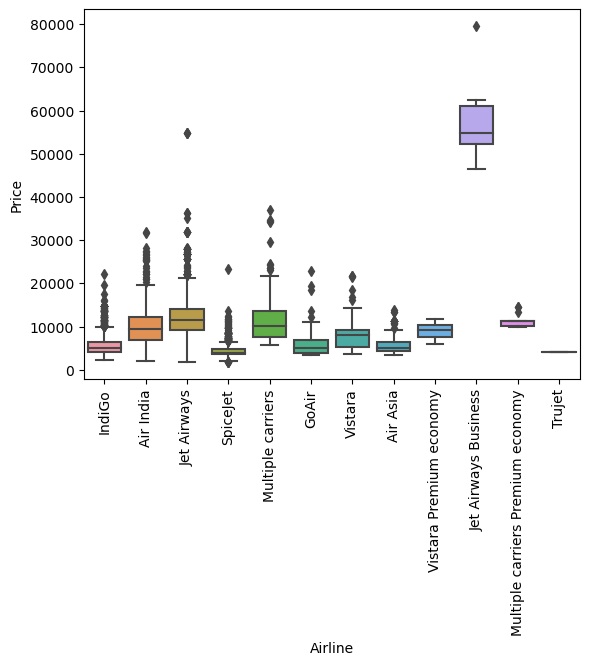

In [23]:
# From graph we can see that Jet Airways Business have the highest Price.
# Apart from the first Airline almost all are having similar median


# Airline vs Price


sns.boxplot(x=df["Airline"],y=df["Price"],data=df.sort_values("Price",ascending=False))
plt.xticks(rotation=90)
plt.show()

In [24]:
Airline=df[["Airline"]]
Airline=pd.get_dummies(Airline,drop_first=True)
Airline.head()


,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


<AxesSubplot:xlabel='Source', ylabel='Price'>

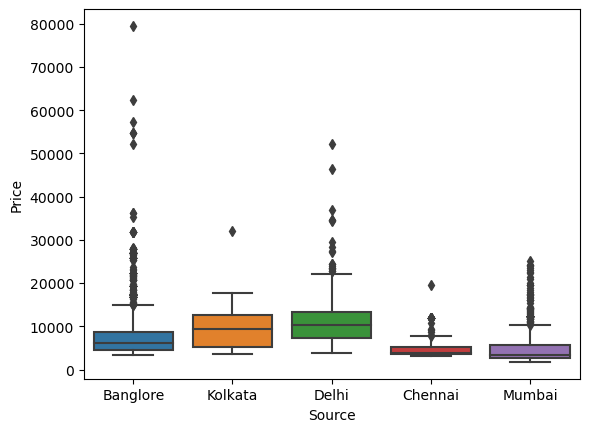

In [25]:
sns.boxplot(x=df["Source"],y=df["Price"],data=df.sort_values("Price",ascending=False))

# Handling Categorical Data
One can find many ways to handle categorical data. Some of them categorical data are,

1)Nominal data --> data are not in any order --> OneHotEncoder is used in this case

2)Ordinal data --> data are in order --> LabelEncoder is used in this case

In [26]:
# As Source is Nominal Categorical data we will perform OneHotEncoding


Source=df[["Source"]]
Source=pd.get_dummies(Source,drop_first=True)
Source.head()


,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [27]:
Destination=df[["Destination"]]
Destination=pd.get_dummies(Destination,drop_first=True)
Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [28]:
df.drop(["Airline","Source","Destination"],axis=1,inplace=True)

In [29]:
df.head()

,Route,Total_Stops,Price,Journey Day,Journey Month,Departure Hour,Departure Minute,Arrival hour,Arrival Min,Duration_hour,Duration_min
0,BLR → DEL,non-stop,3897,24,3,22,20,1,10,2,50
1,CCU → IXR → BBI → BLR,2 stops,7662,1,5,5,50,13,15,7,25
2,DEL → LKO → BOM → COK,2 stops,13882,9,6,9,25,4,25,19,0
3,CCU → NAG → BLR,1 stop,6218,12,5,18,5,23,30,5,25
4,BLR → NAG → DEL,1 stop,13302,1,3,16,50,21,35,4,45


In [30]:
# Route and Total_Stops are related to each other


# As this is case of Ordinal Categorical type we perform LabelEncoder
# Here Values are assigned with corresponding keys

In [31]:
df["Total_Stops"]=df["Total_Stops"].replace({"non-stop":0,"1 stop":1,"2 stops":2,"3 stops":3,"4 stops":4})
df.head()

,Route,Total_Stops,Price,Journey Day,Journey Month,Departure Hour,Departure Minute,Arrival hour,Arrival Min,Duration_hour,Duration_min
0,BLR → DEL,0.0,3897,24,3,22,20,1,10,2,50
1,CCU → IXR → BBI → BLR,2.0,7662,1,5,5,50,13,15,7,25
2,DEL → LKO → BOM → COK,2.0,13882,9,6,9,25,4,25,19,0
3,CCU → NAG → BLR,1.0,6218,12,5,18,5,23,30,5,25
4,BLR → NAG → DEL,1.0,13302,1,3,16,50,21,35,4,45


In [32]:
df.drop(["Route"],axis=1,inplace=True)

In [33]:
df.head()

,Total_Stops,Price,Journey Day,Journey Month,Departure Hour,Departure Minute,Arrival hour,Arrival Min,Duration_hour,Duration_min
0,0.0,3897,24,3,22,20,1,10,2,50
1,2.0,7662,1,5,5,50,13,15,7,25
2,2.0,13882,9,6,9,25,4,25,19,0
3,1.0,6218,12,5,18,5,23,30,5,25
4,1.0,13302,1,3,16,50,21,35,4,45


In [34]:
df=pd.concat([df,Airline,Source,Destination],axis=1)
df.head()

,Total_Stops,Price,Journey Day,Journey Month,Departure Hour,Departure Minute,Arrival hour,Arrival Min,Duration_hour,Duration_min,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0.0,3897,24,3,22,20,1,10,2,50,...,0,0,0,0,0,0,0,0,0,1
1,2.0,7662,1,5,5,50,13,15,7,25,...,0,0,0,1,0,0,0,0,0,0
2,2.0,13882,9,6,9,25,4,25,19,0,...,0,0,1,0,0,1,0,0,0,0
3,1.0,6218,12,5,18,5,23,30,5,25,...,0,0,0,1,0,0,0,0,0,0
4,1.0,13302,1,3,16,50,21,35,4,45,...,0,0,0,0,0,0,0,0,0,1


In [35]:
df.shape

(10683, 30)

In [36]:
df["Total_Stops"].describe()

count    10682.000000
mean         0.824190
std          0.675229
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          4.000000
Name: Total_Stops, dtype: float64

In [37]:
df["Total_Stops"]=df["Total_Stops"].fillna(1.0)

In [38]:
df.isnull().sum()

Total_Stops                                  0
Price                                        0
Journey Day                                  0
Journey Month                                0
Departure Hour                               0
Departure Minute                             0
Arrival hour                                 0
Arrival Min                                  0
Duration_hour                                0
Duration_min                                 0
Airline_Air India                            0
Airline_GoAir                                0
Airline_IndiGo                               0
Airline_Jet Airways                          0
Airline_Jet Airways Business                 0
Airline_Multiple carriers                    0
Airline_Multiple carriers Premium economy    0
Airline_SpiceJet                             0
Airline_Trujet                               0
Airline_Vistara                              0
Airline_Vistara Premium economy              0
Source_Chenna

# Feature Selection
Finding out the best feature which will contribute and have good relation with target variable. Following are some of the feature selection methods,

1)heatmap

2)feature_importance_

3)SelectKBest

In [39]:

x=df.drop("Price",axis=1)
y=df["Price"]

In [40]:
x.shape

(10683, 29)

In [41]:
y.shape

(10683,)

In [42]:
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 7)

std=StandardScaler()

x_train=std.fit_transform(x_train)
x_test=std.transform(x_test)



In [43]:
x_train

array([[ 1.74571713,  0.18167168,  1.11025538, ..., -0.26480694,
        -0.19368443, -0.31287875],
       [ 1.74571713,  0.89065997, -1.46085179, ..., -0.26480694,
        -0.19368443, -0.31287875],
       [-1.21585083,  0.89065997, -0.60381607, ..., -0.26480694,
        -0.19368443, -0.31287875],
       ...,
       [-1.21585083, -1.23630489,  1.11025538, ...,  3.77633609,
        -0.19368443, -0.31287875],
       [-1.21585083, -1.47263432, -1.46085179, ..., -0.26480694,
         5.16303766, -0.31287875],
       [ 0.26493315,  1.59964825,  0.25321966, ..., -0.26480694,
        -0.19368443, -0.31287875]])

In [44]:
x_test

array([[ 0.26493315,  1.24515411,  0.25321966, ..., -0.26480694,
        -0.19368443, -0.31287875],
       [ 0.26493315, -1.47263432,  1.11025538, ..., -0.26480694,
        -0.19368443, -0.31287875],
       [ 0.26493315,  1.24515411,  0.25321966, ..., -0.26480694,
        -0.19368443, -0.31287875],
       ...,
       [-1.21585083, -1.47263432,  0.25321966, ...,  3.77633609,
        -0.19368443, -0.31287875],
       [-1.21585083, -0.52731661,  1.11025538, ...,  3.77633609,
        -0.19368443, -0.31287875],
       [ 1.74571713, -0.52731661,  0.25321966, ..., -0.26480694,
        -0.19368443, -0.31287875]])

# Model Fitting



# 1)Multiple Linear Regression

In [45]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error

model=LinearRegression()
model.fit(x_train,y_train)

y_pred=model.predict(x_test)

print("r2_score:",r2_score(y_test,y_pred))
print("rmse:",np.sqrt(mean_squared_error(y_test,y_pred)))

r2_score: 0.6328905319024534
rmse: 2693.6021484834164


# 2) Decision Tree Regressor

In [46]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score,mean_squared_error

model=DecisionTreeRegressor()
model.fit(x_train,y_train)

y_pred=model.predict(x_test)

print("r2_score:",r2_score(y_test,y_pred))
print("rmse:",np.sqrt(mean_squared_error(y_test,y_pred)))

r2_score: 0.6899088866412806
rmse: 2475.599106054924


# 3) Random Forest Regressor

In [54]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_squared_error

rf=RandomForestRegressor()
rf.fit(x_train,y_train)

y_pred=rf.predict(x_test)

print("r2_score:",r2_score(y_test,y_pred))
print("rmse:",np.sqrt(mean_squared_error(y_test,y_pred)))

r2_score: 0.8300069368387262
rmse: 1832.9526952565418


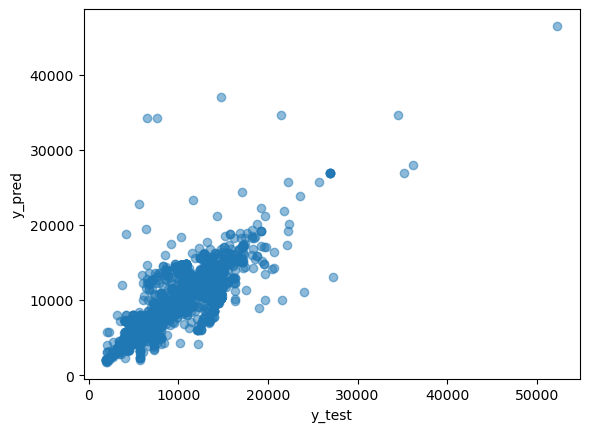

In [48]:
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()


In [52]:
import pickle
# open a file, where you want to store the data
file = open('flight_rf.pkl', 'wb')

# dump information to that file
pickle.dump(rf, file)


     

model = open('flight_rf.pkl','rb')
forest = pickle.load(model)


     

y_prediction = forest.predict(x_test)


print("r2_score:",r2_score(y_test,y_pred))
print("rmse:",np.sqrt(mean_squared_error(y_test,y_pred)))

r2_score: 0.6899088866412806
rmse: 2475.599106054924
